In [62]:
from selenium import webdriver
import time
driver = webdriver.Chrome("c:\webdriver\chromedriver.exe")
driver.get("https://www.instagram.com")
time.sleep(2)
email = 'djagkdbs@naver.com'  
input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
input_id.clear()
input_id.send_keys(email)

password = 'dytjq7169' 
input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]
input_pw.clear()
input_pw.send_keys(password)
input_pw.submit()
time.sleep(3)

C:\Users\djagk\AppData\Local\Temp\ipykernel_10932\1417732659.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("c:\webdriver\chromedriver.exe")
C:\Users\djagk\AppData\Local\Temp\ipykernel_10932\1417732659.py:7: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
C:\Users\djagk\AppData\Local\Temp\ipykernel_10932\1417732659.py:12: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]


In [16]:
def insta_searching(word):
    url = "https://www.instagram.com/explore/tags/"+word
    return url
def select_first(driver):
    first = driver.find_element_by_css_selector("div._aagw")
    first.click()
    time.sleep(4)
def move_next(driver):
    right = driver.find_element_by_css_selector("div._aaqg._aaqh>button")
    right.click()
    time.sleep(4)
def get_content(driver):
    import re
    from bs4 import BeautifulSoup
    import unicodedata  
    html = driver.page_source
    soup = BeautifulSoup(html,"html.parser")
    try:
        content = soup.select("div._a9zs > span")[0].text
        content = unicodedata.normalize('NFC', content)
    except:
        content = ' '
    tags = re.findall(r'#[^\s#,\\]+', content)
    date = soup.select("time._aaqe")[0]['datetime'][:10]
    try:
        like = soup.select("div._aacl._aaco._aacw._aacx._aada._aade > span")[0].text
    except:
        like = 0
    try: 
        place = soup.select("a.oajrlxb2")[0].text
        place = unicodedata.normalize('NFC', place)
    except:
        place = ''
    data = [content, date, like, place, tags]
    return data 



In [17]:
def crawling(driver,words):
    results=[]
    for word in words:
        url=insta_searching(word)
        driver.get(url)
        time.sleep(10)
        select_first(driver)
        target=300
        for i in range(target):
            try:
                data = get_content(driver)
                results.append(data)
                move_next(driver)
            except:
                time.sleep(3)
                move_next(driver)
    return results

In [64]:
china=['중국여행','중국맛집']
japan=['일본여행','일본맛집']
america=['미국여행','미국맛집']
taiwan=['태국여행','태국맛집']
vietnam=['베트남여행','베트남맛집']

In [ ]:
data=crawling(driver,china[0])
    

In [65]:
data=crawling(driver,china)
results_df=pd.DataFrame(data)
results_df.columns=['content','date','like','place','tags']
results_df.to_excel('country/china.xlsx',index=False)

C:\Users\djagk\AppData\Local\Temp\ipykernel_10932\3909749391.py:5: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  first = driver.find_element_by_css_selector("div._aagw")
C:\Users\djagk\AppData\Local\Temp\ipykernel_10932\3909749391.py:9: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  right = driver.find_element_by_css_selector("div._aaqg._aaqh>button")


In [5]:
words_list={'china':china,'japan':japan,'america':america,'taiwan':taiwan,'vietnam':vietnam}
import pandas as pd
for key in words_list:
    data=crawling(driver,words_list[key])
    results_df=pd.DataFrame(data)
    results_df.columns=['content','date','like','place','tags']
    results_df.to_excel('country/'+key+'.xlsx',index=False)

C:\Users\djagk\AppData\Local\Temp\ipykernel_11548\3909749391.py:5: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  first = driver.find_element_by_css_selector("div._aagw")
C:\Users\djagk\AppData\Local\Temp\ipykernel_11548\3909749391.py:9: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  right = driver.find_element_by_css_selector("div._aaqg._aaqh>button")


KeyboardInterrupt: 

In [21]:
import pandas as pd
results_df=pd.DataFrame(data)
results_df.columns=['content','date','like','place','tags']
results_df.to_excel('country/china.xlsx',index=False)

In [ ]:
import pandas as pd
raw_total=pd.read_excel('country/japan.xlsx')
tags_total=[]
for tags in raw_total['tags']:
    tags=tags[2:-2]
    tags_list=tags.split("', '")
    
    for tag in tags_list:
        if tag=='':
            continue
        tags_total.append(tag)
tags_total

from collections import Counter    
tag_counts=Counter(tags_total)

tag_counts.most_common(150)

In [56]:
STOPWORD=['#일본여행','#맛스타그램','#카페스타그램','#일본맛집','#일본','#사진계정맞팔','#여행에미치다']
import re
p=re.compile('#[^가-힣]+')
tags_total_selected=[]
for tag in tags_total:
    m=p.match(tag)
    if tag not in STOPWORD:
        if m==None:
            tags_total_selected.append(tag)
tag_counts_selected=Counter(tags_total_selected)
tag_counts_selected.most_common(50)

[('#먹스타그램', 84),
 ('#맛집', 74),
 ('#도쿄맛집', 57),
 ('#여행스타그램', 48),
 ('#여행', 43),
 ('#일본생활', 34),
 ('#일본카페', 34),
 ('#도쿄여행', 32),
 ('#도쿄', 27),
 ('#오사카', 23),
 ('#일본어공부', 21),
 ('#일상', 21),
 ('#해외여행', 19),
 ('#맞팔', 19),
 ('#오사카여행', 18),
 ('#홋카이도', 18),
 ('#먹방', 18),
 ('#맛집추천', 17),
 ('#일본감성', 17),
 ('#좋아요', 17),
 ('#일본유학', 17),
 ('#카페', 17),
 ('#맛있다그램', 16),
 ('#오사카맛집', 16),
 ('#일본음식', 13),
 ('#좋아요반사', 13),
 ('#맛있다', 13),
 ('#일본어', 12),
 ('#여행사진', 12),
 ('#삿포로', 12),
 ('#가족여행', 11),
 ('#카페탐방', 10),
 ('#일본카페투어', 10),
 ('#삿포로여행', 10),
 ('#도쿄이자카야', 10),
 ('#감성사진', 9),
 ('#라멘', 9),
 ('#일본인', 9),
 ('#오키나와', 9),
 ('#포토그래퍼', 9),
 ('#홋카이도여행', 9),
 ('#일본요리', 9),
 ('#카페그램', 9),
 ('#카페샷', 9),
 ('#감성카페', 9),
 ('#일본어회화', 8),
 ('#교토', 8),
 ('#아사쿠사', 8),
 ('#북해도프로', 8),
 ('#북해도', 8)]

In [53]:
import matplotlib.pylab as plt
from wordcloud import WordCloud
import platform
if platform.system()=='Windows':
    font_path='c:/Windows/Fonts/malgun.ttf'
    

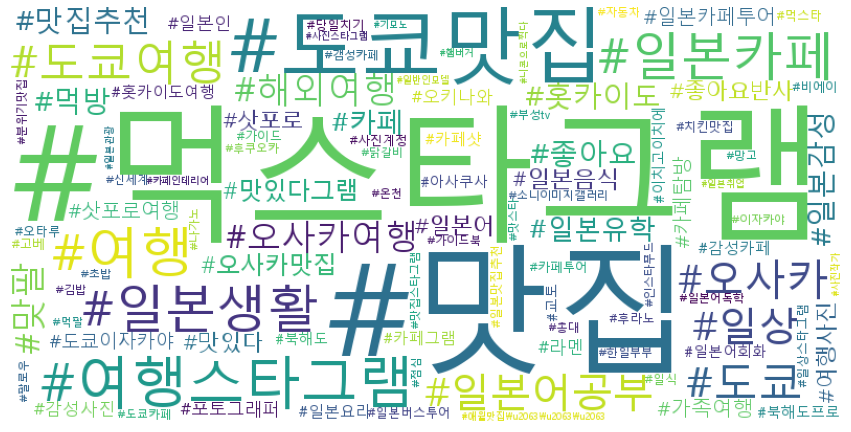

In [54]:
wordcloud=WordCloud(font_path=font_path,
                    background_color='white',
                    max_words=100,
                    relative_scaling=0.3,
                    width=800,
                    height=400).generate_from_frequencies(tag_counts_selected)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country/Japan.png')